In [57]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
#importing tools

In [58]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [59]:
%run data_cleaning.py
df = df_cleaned.copy()

In [60]:
import pandas as pd # data processing
import numpy as np # linear algebra
import seaborn as sns # for plotting
import matplotlib.pyplot as plt



# Load the dataset
df = pd.read_csv('cleaned_data_new.csv')

In [61]:
unique_status_values = df['Status'].unique()
print(unique_status_values) #checking what values alive and dead are mapped to 

[0 1]


In [62]:
# Apply the transformation
df['Survived 50 months '] = df['Survival Months'].apply(lambda x: 1 if x > 50 else 0)

# Drop the original "Survival Months" column

# Select features and target variable
X = df[['Age','Tumor Size (mm)', 'Regional Node Examined', 'Regional Node Positive']]
y = df['Survived 50 months ']  # Use the new target variable "Survived 50 months"

# Print the updated DataFrame
df.head(100)

,Age,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size (mm),Estrogen Status,Progesterone Status,Regional Node Examined,Regional Node Positive,Survival Months,Status,Survived 50 months
0,68,0,0,0,2,1,4,1,1,24,1,60,0,1
1,50,1,1,2,1,1,35,1,1,14,5,62,0,1
2,58,2,2,4,1,1,63,1,1,14,7,75,0,1
3,58,0,0,0,2,1,18,1,1,2,1,84,0,1
4,47,1,0,1,2,1,41,1,1,3,1,50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,61,0,1,2,1,1,14,1,1,15,4,66,0,1
96,37,2,0,2,0,1,51,1,1,3,3,79,1,1
97,46,1,2,4,1,1,50,1,1,34,10,74,0,1
98,45,1,0,1,2,1,45,1,1,14,2,69,0,1


In [63]:
#setting up train test 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.8,random_state=0)

#its using 80 percent to train the model and the rest is to predict 
#

In [64]:
clf=GaussianNB() #initialises and trains classier using data
clf.fit(X_train,y_train)


GaussianNB()

In [65]:
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))


#What it means 
#Precision measures the positive predictions made by the model
#high precision indicates that the model makes few false positive predictions
# Recall measures the proportion of true positive predictions among all actual positive instances in the dataset
# A high recall indicates that the model captures most of the positive instances
# The f1 score is the mean of precision and recall
#Accuracy measures the overall correctness of the model's predictions
#Macro average calculates the average of precision, recall, and F1-score across all classes
#Weighted average calculates the average of precision, recall, and F1-score, weighted by the number of instances of each class. 
# Support indicates the number of instances of each class in the dataset



              precision    recall  f1-score   support

           0       0.36      0.04      0.07       246
           1       0.91      0.99      0.95      2561

    accuracy                           0.91      2807
   macro avg       0.64      0.52      0.51      2807
weighted avg       0.87      0.91      0.87      2807



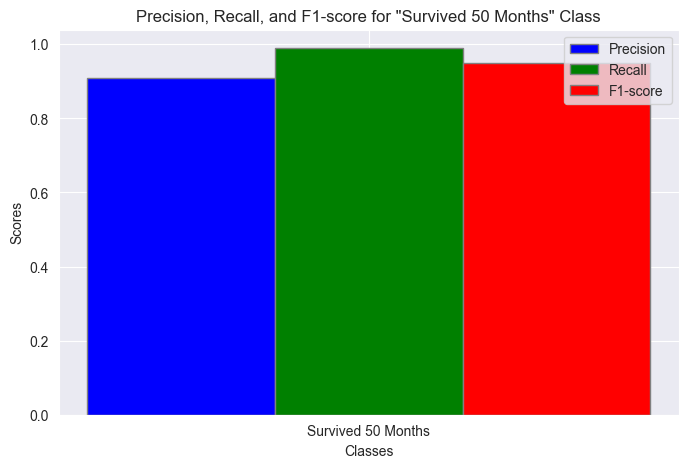

In [66]:

import matplotlib.pyplot as plt

# Precision, Recall, and F1-score values for 'Survived 50 Months' class
precision = [0.91]
recall = [0.99]
f1_score = [0.95]

# Labels for the class
labels = ['Survived 50 Months']

# Plotting
fig, ax = plt.subplots(figsize=(8, 5))

# Width of bars
bar_width = 0.2

# Position of bars on x-axis
r1 = range(len(precision))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create bars
ax.bar(r1, precision, color='b', width=bar_width, edgecolor='grey', label='Precision')
ax.bar(r2, recall, color='g', width=bar_width, edgecolor='grey', label='Recall')
ax.bar(r3, f1_score, color='r', width=bar_width, edgecolor='grey', label='F1-score')

# Adding xticks
ax.set_xticks([r + bar_width for r in range(len(precision))])
ax.set_xticklabels(labels)

# Adding legend
ax.legend()

# Adding labels
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1-score for "Survived 50 Months" Class')

# Show plot
plt.show()


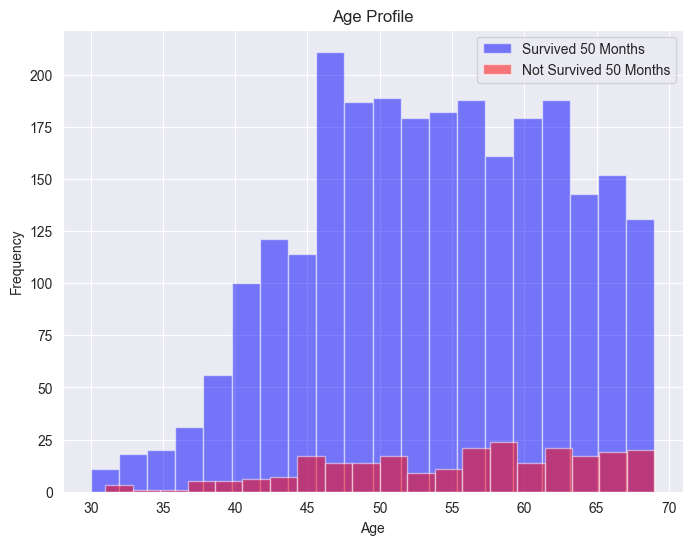

In [67]:
import matplotlib.pyplot as plt

# Plot histogram for 'Age'
plt.figure(figsize=(8, 6))
plt.hist(X_test.loc[y_test == 1, 'Age'], bins=20, alpha=0.5, color='blue', label='Survived 50 Months')
plt.hist(X_test.loc[y_test == 0, 'Age'], bins=20, alpha=0.5, color='red', label='Not Survived 50 Months')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Profile')
plt.legend()
plt.show()

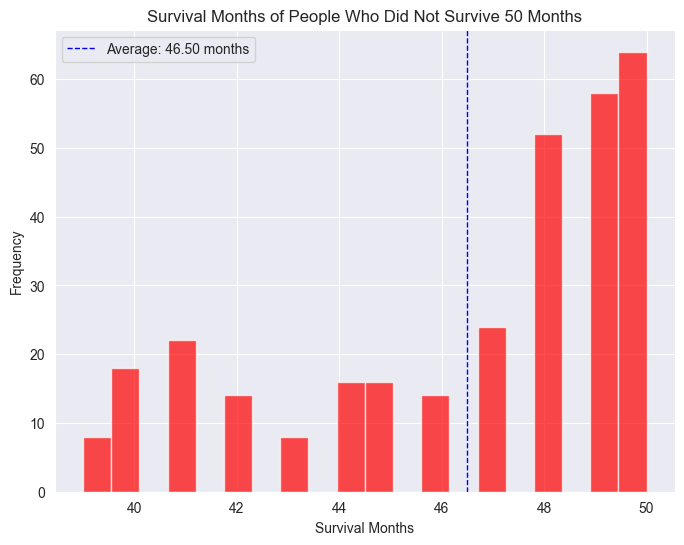

In [68]:
import matplotlib.pyplot as plt


# Calculate average survival months of people who did not survive (class 0)
average_survival_months_died = df.loc[df['Survived 50 months '] == 0, 'Survival Months'].mean()

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(df.loc[df['Survived 50 months '] == 0, 'Survival Months'], bins=20, color='red', alpha=0.7)
plt.axvline(average_survival_months_died, color='blue', linestyle='dashed', linewidth=1, label=f'Average: {average_survival_months_died:.2f} months')
plt.xlabel('Survival Months')
plt.ylabel('Frequency')
plt.title('Survival Months of People Who Did Not Survive 50 Months')
plt.legend()
plt.show()